# Fly Me to the Moon!


In this assignment:
1. (2 points) Load a json file of Doge Coin tweets from the period Feb 2 - Feb 8, 2021. After loading them, put the following information into a dataframe:
    - The full text of the Tweet. (string)
    - The author of the tweet, that is their username (string)
    - Whether or not it is a retweet. (boolean)
    - The timestamp. (datetime)
    - The date (YYYY-MM-DD) of the Tweet. (date)

   
__Hint: list comprehensions can be your best friend!__

2. (2 points) Create a "clean_text" column by doing the following to "full_text":
    - removing links, which are strings that start with "http"
    - removing hashtags, which are strings that start with "#"
    - removing mentions, which are strings that start with "@"
    - converting text to lower case.
    - removing punctuation.
    
   Now report:
    - The top 10 most common words besides "doge", "coin", and "dogecoin" (while also omitting stop words).
    - The top 5 Twitter accounts that are mentioned (hint: use a regular expression).
    - The top 5 most RT'ed tweets.
    - The top 5 hashtags besides "#doge" and "dogecoin" (hint: use a regular expression).
    
__Extra Credit: Report the top 5 most common emojis (1 point)__

3. (2 points) Now read in the json file of Elon Musk's tweets. 
    - Find the minute volume of Elon Musk's tweets, and plot them together with the minute volume of Doge tweets. Interpret what you see. Note on the graph any Elon Musk tweets having to do with Doge Coin.
    - On the day Elon Musk tweeted just the word "doge," what were the top 10 words? What are the differences between these and the top 10 most common words in the whole data?

4. (3 points) Run the Doge Coin tweets through sentiment analysis, and report:
    - The 5 most negative and 5 most positive tweets.
    - A graph of the sentiment over time together with tweet volume. Put a dashed verticle line at the timestamp where Elon tweeted just the word "doge."
    
5. (6 points) Doge Coin Prices and Tweets.

   a. Read in the Doge Coin price data at the 2 minute level and extract the volume, the closing price, and the timestamp. Then create two graphs:
   - The Doge Coin closing price versus volume during the sample period. Put a dashed verticle line at the timestamp where Elon tweeted just the word "doge." Interpret what the graph shows.
   - Graph __at least__ the average Doge Coin tweet sentiment and the Doge Coin price. Annotate or graph any other information you think is relevant (__Extra Credit Graph: Put "My Submission" at the top of the cell to submit for one extra credit point__).
   - Do you think that Elon Musk moved the price of Doge Coin? Was the effect permanent?

   b. Calculate the correlation between the Dog Coin Tweet sentiment and the Doge Coin price in this sample period. Then suppose someone asks you to answer this question: Did positive Twitter sentiment increase the price of Doge Coin from Feb 2 to Feb 8, 2021? Specifically, describe in detail:
     - The data you would need in addition to these data sources.
     - The way you would read in the data and manipulate it.
     - The sort of analysis or statistics you would calculate to answer the question.
    

# Atharva Rajadnya
asr6@illinois.edu

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import string
import emoji
from datetime import timedelta
from datetime import datetime
from itertools import groupby
import time
from collections import Counter
import regex
import matplotlib.dates as mdates

# 1

In [2]:
# Loading json file for doge_sample_100k

with open('doge_sample_100k.json', 'r') as f:
    doge_data = json.load(f)

In [3]:
# Full text
    
text = [tweet['text'] for tweet in doge_data]
df_text = pd.DataFrame({'text': text})

df_text.head()

,text
0,hayallerim için dogecoin doge #doge #dogecoin ...
1,RT @4ngryDoge: Me watching my investment skyro...
2,The only reason behind the $doge pump is a tra...
3,RT @closfranco: Those selling are going to reg...
4,@DOGEREVOLUTION1 @KingValhallaWSB #DogecoinToT...


In [4]:
# Author and username

username = [tweet['user']['screen_name'] for tweet in doge_data]
df_username = pd.DataFrame({'username': username})

df_username.head()

,username
0,infectiousmoda
1,melodydabmore
2,Mpi_Ceee
3,Alexia88788466
4,DOGECOINPAGE


In [5]:
# Retweets

is_retweet = ['retweeted_status' in tweet for tweet in doge_data]
df_retweet = pd.DataFrame({'is_retweet': is_retweet})

df_retweet.head()

,is_retweet
0,False
1,True
2,False
3,True
4,False


In [6]:
# Timestamps

timestamp = [pd.to_datetime(tweet['created_at'], format='%a %b %d %H:%M:%S +0000 %Y') for tweet in doge_data]
df_timestamp = pd.DataFrame({'timestamp': timestamp})

df_timestamp.head()

,timestamp
0,2021-02-04 09:11:34
1,2021-02-06 04:27:46
2,2021-02-05 07:56:14
3,2021-02-02 16:38:17
4,2021-02-06 01:04:11


In [7]:
# Dates

date = [pd.to_datetime(tweet['created_at'], format='%a %b %d %H:%M:%S +0000 %Y').date().strftime('%Y-%m-%d') for tweet in doge_data]
df_date = pd.DataFrame({'date': date})

df_date.head()

,date
0,2021-02-04
1,2021-02-06
2,2021-02-05
3,2021-02-02
4,2021-02-06


# 2

In [8]:
# Creating new column with clean text

def clean_text(text):
    
    # Removing links
    text = re.sub(r'http\S+', '', text)
    
    # Removing hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Removing mentions
    text = re.sub(r'@\w+', '', text)
    
    # Converting to lower case
    text = text.lower()
    
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

In [9]:
# Adding columns, removing duplicates and retweets

df_text['clean_text'] = df_text['text'].apply(clean_text)
df_text.drop_duplicates(subset=['clean_text'], inplace=True)
df_text = df_text[~df_text['clean_text'].str.startswith('rt')]

In [10]:
# Top 10 most common words

cv = CountVectorizer(stop_words = stopwords.words('english') + list(string.punctuation) + ['…', 'rt', 'tweet', 'retweet', 'amp', 'like', 'follow', 'hit'])
cv_fit = cv.fit_transform(df_text['clean_text'])

word_count = pd.DataFrame(cv_fit.sum(axis=0), columns=list(cv.get_feature_names_out()))
word_count = word_count.transpose().sort_values(0, ascending=False)

unwanted_words = ['doge', 'coin', 'dogecoin']
for unwanted_word in unwanted_words:
    word_count = word_count.drop(unwanted_word, errors='ignore')

top10_words = word_count.head(10)
top10_words = pd.DataFrame({'count': top10_words[0]})
print(top10_words)

        count
buy      1936
get      1240
lets     1111
moon      991
hold      964
go        922
dont      793
people    697
pump      636
im        618


In [11]:
# Top 5 Twitter accounts

mentions = []
for tweet in doge_data:
    text = tweet['text']
    
    if text in df_text['clean_text'].tolist():
        continue
    
    if text.startswith('RT'):
        continue
    
    mentions += re.findall(r'@\w+', text)

mention_count = pd.DataFrame({'count': pd.Series(mentions).value_counts()})
top5_mentions = mention_count.head(5)
print(top5_mentions)

               count
@elonmusk       3690
@DogecoinRise    538
@latokens        503
@dogecoin        445
@genesimmons     248


In [12]:
# Top 5 most retweeted accounts

df_retweet_username = pd.concat([df_retweet, df_username], axis=1)

top5_retweeted = df_retweet_username[df_retweet_username['is_retweet'] == True]['username'].value_counts().nlargest(5)

top5_retweeted = pd.DataFrame({'username': top5_retweeted.index, 'count': top5_retweeted.values})
top5_retweeted = top5_retweeted.reset_index(drop=True)[['username', 'count']]
print(top5_retweeted)

        username  count
0    hugoavila32    243
1      ComicalJC    236
2    lok72898413    225
3  BotOfDogecoin    204
4     Spiderplan    202


In [13]:
# Top 5 hashtags

hashtags = []
for tweet in doge_data:
    text = tweet['text']
    
    if text in df_text['clean_text'].tolist():
        continue

    if text.startswith('RT'):
        continue
    
    hashtags += re.findall(r'#\w+', text)

unwanted_hashtags = ['#doge', '#dogecoin']
for unwanted_hashtag in unwanted_hashtags:
    hashtags = [hashtag for hashtag in hashtags if hashtag.lower() != unwanted_hashtag]
    
hashtag_count = pd.DataFrame({'count': pd.Series(hashtags).value_counts()})
top5_hashtags = hashtag_count.head(5)
print(top5_hashtags)

                    count
#dogearmy            4750
#DogecoinToTheMoon   3309
#DogeToAdollar       1291
#DogecoinRise        1262
#Dogecoinarmy        1259


# 2 (extra credit)

In [14]:
# Top 5 emojis

def extract_emojis(text):
    emoji_pattern = regex.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=regex.UNICODE)
    return emoji_pattern.findall(text)

df_text['emojis'] = df_text['text'].apply(extract_emojis)

emojis = Counter([emoji for sublist in df_text['emojis'] for emoji in sublist])

top_emojis = emojis.most_common(5)
print(top_emojis)

[('🚀', 624), ('🚀🚀🚀', 288), ('🚀🚀', 188), ('😂', 145), ('💰', 128)]


# 3

In [15]:
# Loading Elon tweets

with open('elon_tweets.json', 'r') as f:
    elon_data = json.load(f)

In [16]:
# Minute volume of Elon's and doge tweets

for tweet in elon_data:
    created_at = tweet['created_at']
    tweet['datetime'] = pd.to_datetime(created_at, format = '%a %b %d %H:%M:%S %z %Y')

elon_df = pd.DataFrame(elon_data)
elon_df['volume'] = 1
elon_minute_volume = elon_df.groupby(pd.Grouper(key='datetime', freq='1min')).sum()['volume']

# Minute volume of tweets mentioning doge

elon_doge_df = elon_df[elon_df['full_text'].str.contains('doge|dogecoin')]
elon_doge_minute_volume = elon_doge_df.groupby(pd.Grouper(key='datetime', freq='1min')).sum()['volume']

for tweet in doge_data:
    created_at = tweet['created_at']
    tweet['datetime'] = pd.to_datetime(created_at, format='%a %b %d %H:%M:%S %z %Y')

doge_df = pd.DataFrame(doge_data)
doge_df['volume'] = 1
doge_minute_volume = doge_df.groupby(pd.Grouper(key='datetime', freq='1min')).sum()['volume']

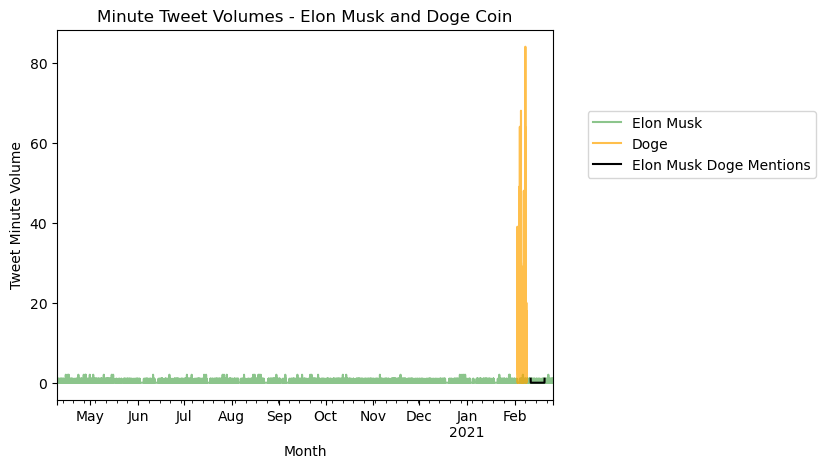

In [17]:
# Plotting all 3 minute volumes

fig, ax = plt.subplots()
elon_minute_volume.plot(ax=ax, label='Elon Musk', color='green', alpha=0.45)
doge_minute_volume.plot(ax=ax, label='Doge', color='orange', alpha=0.7)
elon_doge_minute_volume.plot(ax=ax, label='Elon Musk Doge Mentions', color='black')
plt.legend()

ax.set_xlabel('Month')
ax.set_ylabel('Tweet Minute Volume')
ax.set_title('Minute Tweet Volumes - Elon Musk and Doge Coin')
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)
        
plt.show()

The above graph shows the tweet minute volumes for Elon and doge tweets respectively. Elon tweet data is available for a larger timeframe hence we see more data. The minute volume is roughly the same thorughout with small spikes in some areas. He had some tweets mentioning the word doge which can be see by the black line plot.

The doge tweet data is limited to only 4 days. However, the minute volume is very hence we see the huge yellow lines in the plot.

In [18]:
# Top 10 words when Elon tweeted doge

doge_tweet = elon_df[elon_df['full_text'].str.contains('doge')]['datetime'].iloc[0].date()
elon_doge_day_df = elon_df[elon_df['datetime'].dt.date == doge_tweet]

vectorizer = CountVectorizer(stop_words = stopwords.words('english') + list(string.punctuation) + ['…', 'rt', 'tweet', 'retweet', 'amp', 'like', 'follow', 'hit'])
elon_doge_words = vectorizer.fit_transform(elon_doge_day_df['full_text'])
elon_doge_word_counts = pd.DataFrame(elon_doge_words.sum(axis=0), columns=vectorizer.get_feature_names_out()).T.sort_values(by=0, ascending=False)

top_10_doge_words = elon_doge_word_counts.head(10).rename(columns={0: 'count'})
print(top_10_doge_words)

             count
data             3
crypto           2
peterschiff      2
fun              2
gold             2
dollar           2
dogecoin         2
rigs             2
people           1
pegging          1


In [19]:
# Top 10 words in entire Elon dataset

elon_words = vectorizer.fit_transform(elon_df['full_text'])
elon_word_counts = pd.DataFrame(elon_words.sum(axis=0), columns=vectorizer.get_feature_names_out()).T.sort_values(by=0, ascending=False)

top_10_elon_words = elon_word_counts.head(10).rename(columns={0: 'count'})
print(top_10_elon_words)

                count
co                373
https             367
tesla             299
erdayastronaut    223
spacex            220
flcnhvy           213
ppathole          196
yes               143
great             124
teslaownerssv     116


The main difference between these two sets of words is the focus on different topics. 

The top 10 words when Elon tweeted about Dogecoin are more varied and cover a wider range of topics, including cryptocurrency, finance, and people (such as Peter Schiff). 

The top 10 words in the entire Elon dataset, on the other hand, are more focused on specific topics related to Elon Musk's businesses and interests, including Tesla, SpaceX, and related individuals or entities such as "erdayastronaut", "flcnhvy", and "ppathole". 

The top 10 words in the entire Elon dataset also include some general expressions such as "yes" and "great", which could be related to the positive sentiment surrounding Elon Musk and his businesses. 

Overall, the main difference is that the top 10 words when Elon tweeted about Dogecoin are more diverse and cover a wider range of topics, while the top 10 words in the entire Elon dataset are more focused on specific technology-related topics.

# 4

In [20]:
# Sentiment analysis

doge_data = pd.DataFrame(doge_data)

sid = SentimentIntensityAnalyzer()

doge_data['sentiment'] = doge_data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [21]:
# Printing the 5 most positive tweets

sorted_data = doge_data.sort_values(by='sentiment', ascending=False)
unique_data = sorted_data.drop_duplicates(subset='text')

for text, score in unique_data.head(5)[['text', 'sentiment']].values:
    print(f"{text}\nSentiment score: {score}\n")

"But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faithfulness, gentleness, and self-… https://t.co/9bFj9AYJNE
Sentiment score: 0.9857

"But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faithfulness, gentleness, and self-… https://t.co/fsjeDAuPzb
Sentiment score: 0.9857

@LovecoinToken HELP US SPREAD LOVE, PEACE, HAPPINESS &amp; ECONOMIC FREEDOM WORLDWIDE. #lovecoin #dogecoin #bitcoin

My… https://t.co/d05t1qb0K1
Sentiment score: 0.9746

On the bright side atleast my great great great great grandchildren will be taken care of at this pace. 
#Dogecoin #pumpmyballz
Sentiment score: 0.9735

RT @eh1992m: Best #Cryptocurrencies #Dice in the world👌🤑
you can easily earn free crypto like 
#Ethereum #DOGE #BTC #LTC
big free reward fo…
Sentiment score: 0.9607



In [22]:
# Printing the 5 most negative tweets

sorted_data = doge_data.sort_values(by='sentiment', ascending=True)
unique_data = sorted_data.drop_duplicates(subset='text')

for text, score in unique_data.head(5)[['text', 'sentiment']].values:
    print(f"{text}\nSentiment score: {score}\n")

RT @AARONOP711: STOP SELLING STOP SELLING STOP SELLING STOP STOP SELLING STOP SELLING  STOP SELLING STOP SELLING #dogecoin
Sentiment score: -0.97

RT @thenewcryptoguy: REMEMBER THE SCARE TACTICS THEY WANT YOU TO SELL THIS LOW! NO PANIC SELLERS NO PANIC SELLERS 
#dogetothemoon #dogearmy…
Sentiment score: -0.9636

@elonmusk fuck yea. Do it. Sick of apples bullshit politics shit. Fuck them up and use that stack of cash the peopl… https://t.co/Tl4paIvqp4
Sentiment score: -0.9565

RT @Stacey_SunShyne: This #dogecoin shit is getting FRUSTRATING!! How in the FUCK can we expect it to go to the moon when you SCARY BITCHES…
Sentiment score: -0.9515

RT @KingBrianCruz: Invest &amp; hold, stop panic selling. Get it to 10 cents!!!! SERIOUSLY PEOPLE STOP PANIC SELLING LEARN THE MARKET FOR YOU N…
Sentiment score: -0.9439



In [23]:
# Finding timestamp of Elon's tweet containing only the word "doge"

for tweet in elon_data:
    text = tweet['full_text'].lower()
    if text == 'doge' or text == 'doge ':
        elon_doge_timestamp = pd.to_datetime(tweet['created_at'], format='%a %b %d %H:%M:%S %z %Y')
        print("Elon tweeted 'doge' on", elon_doge_timestamp)

Elon tweeted 'doge' on 2021-02-04 07:35:35+00:00


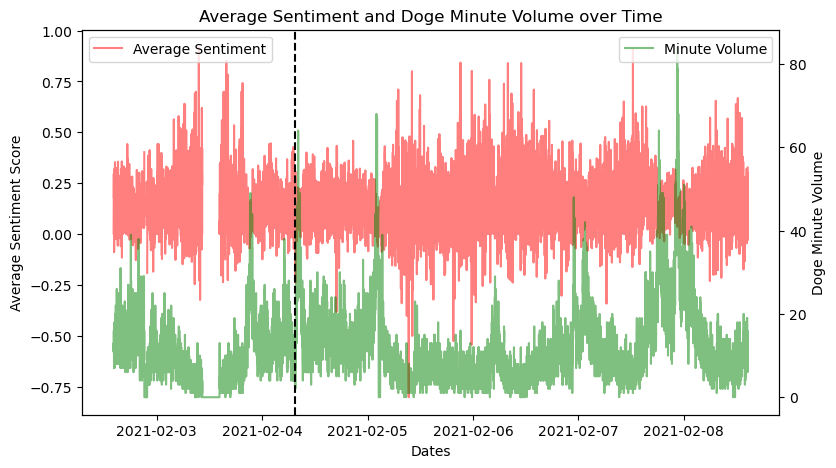

In [24]:
# Plotting sentiment and tweet volume over time

doge_minute_sentiment = doge_data.groupby(pd.Grouper(key='datetime', freq='1min')).mean()['sentiment']

fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()
ax1.plot(doge_minute_sentiment.index, doge_minute_sentiment, color='red', alpha=0.5, label='Average Sentiment')
ax2.plot(doge_minute_volume.index, doge_minute_volume, color='green', alpha=0.5, label='Minute Volume')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Average Sentiment Score', color='black')
ax2.set_ylabel('Doge Minute Volume', color='black')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Average Sentiment and Doge Minute Volume over Time')
plt.axvline(elon_doge_timestamp, color='black', linestyle='--')

plt.show()

# 5

In [25]:
# Reading doge coin price data at the 2 minute level 

doge_2min = pd.read_csv('doge_coin_by_2min.csv')

volume = doge_2min['Volume']
closing_price = doge_2min['Close']
timestamp = doge_2min['Datetime']
timestamp = pd.to_datetime(timestamp)

# 5a

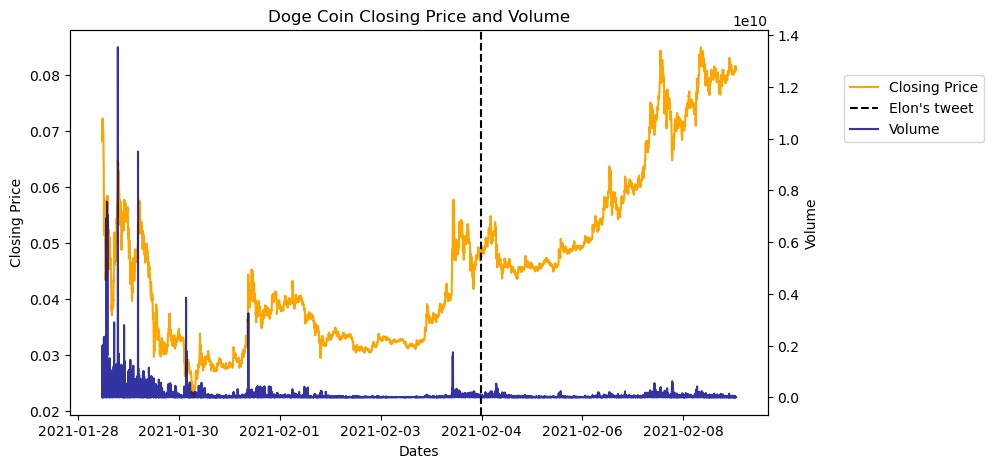

In [26]:
# Plotting Dogecoin closing price vs volume

fig, ax1 = plt.subplots(figsize=(9, 5))

ax1.set_ylabel('Closing Price', color='black')
ax1.plot(timestamp, doge_2min['Close'], color='orange', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.set_ylabel('Volume', color='black')
ax2.plot(timestamp, doge_2min['Volume'], color='darkblue', label='Volume', alpha=0.8)
ax2.tick_params(axis='y', labelcolor='black')

date_fmt = mdates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(date_fmt)

interval = mdates.HourLocator(interval=42)
ax1.xaxis.set_major_locator(interval)

ax1.set_xlabel('Dates')

elon_doge_timestamp = pd.to_datetime('2021-02-04 19:45:03')
ax1.axvline(elon_doge_timestamp, linestyle='--', color='black', label="Elon's tweet")

plt.title('Doge Coin Closing Price and Volume')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines += lines2
labels += labels2
legend = ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.1, 0.9))

plt.show()

The graph shows the closing price of Dogecoin versus its trading volume over a period of time. The closing price is plotted in orange on the left y-axis while the trading volume is plotted in blue on the right y-axis. The x-axis shows the date and is formatted to display the year, month, and day.

The dashed vertical line on the graph represents the timestamp when Elon Musk tweeted the word "doge." The tweet caused a spike in the closing price of Dogecoin, but it had little effect on the trading volume.

From the graph, we can see that the closing price of Dogecoin has increased significantly over time, with several spikes in price. The volume of Dogecoin, on the other hand, has remained relatively stable over the same period. The graph shows that there is no clear correlation between the trading volume and the closing price of Dogecoin, however, the closing price increased significantly after Elon's tweet.

# My Submission

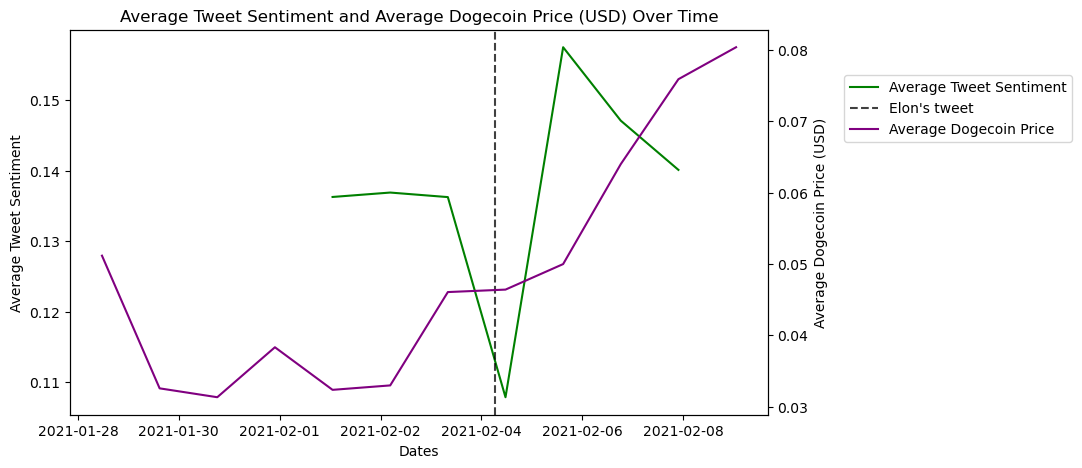

In [27]:
# Graph including average tweet sentiment and average dogecoin price

doge_data['datetime'] = pd.to_datetime(doge_data['datetime']).dt.date
avg_sentiment = doge_data.groupby('datetime')['sentiment'].mean()

doge_2min['date'] = pd.to_datetime(doge_2min['Datetime']).dt.date
avg_price = doge_2min.groupby('date')['Close'].mean()

fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()

ax1.plot(avg_sentiment.index, avg_sentiment.values, color='green', label='Average Tweet Sentiment')
ax2.plot(avg_price.index, avg_price.values, color='purple', label='Average Dogecoin Price')

elon_doge_timestamp = pd.to_datetime('2021-02-04 19:45:03')
ax1.axvline(elon_doge_timestamp, linestyle='--', color='black', label="Elon's tweet", alpha=0.75)

date_fmt = mdates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(date_fmt)

interval = mdates.HourLocator(interval=42)
ax1.xaxis.set_major_locator(interval)

ax1.set_xlabel('Dates')
ax1.set_ylabel('Average Tweet Sentiment', color='black')
ax2.set_ylabel('Average Dogecoin Price (USD)', color='black')

plt.title('Average Tweet Sentiment and Average Dogecoin Price (USD) Over Time')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines += lines2
labels += labels2
legend = ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.1, 0.9))

plt.show()

Elon Musk's tweets about Dogecoin have had a significant impact on the price of the cryptocurrency. However, it's difficult to say whether the effects of Musk's tweets on Dogecoin's price are permanent. In many cases, the price of Dogecoin has fallen back down after surging following a Musk tweet.

If we consider this graph, the average sentiment of tweets has increased for a short while after Elon tweeted just the word 'doge'. On the other hand, the average price has increased significantly. 

There can be a case made that Elon's tweet has led to an increase in the average price of dogecoin. However, the price had an increasing trend even before Elon's tweet. So we cannot say this with certainty. 

There are many other factors that could have influenced the price of Dogecoin, such as overall market sentiment, news events, and changes in supply and demand. So while Elon's tweets can have a significant impact on Dogecoin's price in the short term, it's difficult to say whether they have a lasting effect.

# 5b

In [28]:
# Correlation between sentiment and price

doge_data['date'] = pd.to_datetime(doge_data['datetime']).dt.date
avg_sentiment = doge_data.groupby('date')['sentiment'].mean()

doge_2min['date'] = pd.to_datetime(doge_2min['Datetime']).dt.date
avg_price = doge_2min.groupby('date')['Close'].mean()

merged_df = pd.merge(avg_sentiment, avg_price, on='date')
corr = round(merged_df['sentiment'].corr(merged_df['Close']), 5)

print("Correlation between dogecoin tweet sentiment and dogecoin price: ", corr)

Correlation between dogecoin tweet sentiment and dogecoin price:  0.23996


# Additional data requirements

Based on the correlation value obtained, there appears to be a positive correlation between Dogecoin tweet sentiment and Dogecoin price, suggesting that positive Twitter sentiment could have influenced the price of Dogecoin during the sample period.

<b>To investigate this further and determine if positive Twitter sentiment did in fact increase the price of Dogecoin from Feb 2 to Feb 8, 2021, we would need the following additional data:</b>
1) More granular tweet sentiment data 

2) More granular Dogecoin price data (e.g: 1-minute or 30-second intervals) 

3) Other factors that may have affected Dogecoin price like market sentiment, news events, or other external factors.

4) Additional tweet data which includes a greater sample size 

5) Demographic data on Twitter users such as age, location, and gender

# Analyzing data

Dogecoin price data: We would need to obtain Dogecoin price data for the period from Feb 2 to Feb 8, 2021, at a granular level. This data could be obtained from cryptocurrency exchanges or other sources that track Dogecoin price movements.

Dogecoin-related tweet data: We would also need to obtain a sample of Dogecoin-related tweets from Feb 2 to Feb 8, 2021. This data could be obtained by using the Twitter API or by scraping tweets using a web scraping tool.

<b>Once we have obtained these data sources, we would need to manipulate them as follows:</b>

1) <b>Clean and preprocess the tweet data:</b> We would need to clean and preprocess the tweet data by removing irrelevant information (e.g., URLs, usernames, hashtags), removing stop words, and performing other text preprocessing techniques. We may also need to perform sentiment analysis on the tweets to determine their sentiment.

2) <b>Aggregate tweet data:</b> Since we have Dogecoin price data at a granular level, we would need to aggregate the tweet data in a similar way to match the temporal granularity of the Dogecoin price data.

3) <b>Merge tweet data with Dogecoin price data:</b> Once we have aggregated the tweet data, we would need to merge it with the Dogecoin price data. This would allow us to analyze the relationship between tweet sentiment and Dogecoin price on a particular basis.

4) <b>Analyze the correlation between tweet sentiment and Dogecoin price:</b> We could then calculate the correlation between tweet sentiment and Dogecoin price for the period from Feb 2 to Feb 8, 2021. This would help us determine whether positive tweet sentiment was associated with increases in Dogecoin price during this period. We could also perform further analysis (e.g., regression analysis) to identify other factors that may be influencing Dogecoin price. 


# Analysis and statistical tools and techniques

1) <b>Sentiment analysis:</b> We would need to perform sentiment analysis on the Dogecoin-related tweets to determine whether they have a positive, negative, or neutral sentiment. This analysis would involve using a sentiment analysis tool, such as the VADER sentiment analysis tool, to generate sentiment scores for each tweet.

2) <b>Correlation analysis:</b> We could then calculate the correlation between the sentiment scores of the Dogecoin-related tweets and the price of Dogecoin during the period from Feb 2 to Feb 8, 2021. This analysis would help us determine whether there is a relationship between tweet sentiment and Dogecoin price during this period.

3) <b>Regression analysis:</b> We could also perform regression analysis to identify other factors that may be influencing Dogecoin price during this period. This analysis would involve building a regression model that predicts Dogecoin price based on variables such as tweet sentiment, trading volume, and other relevant factors.

4) <b>Statistical tests:</b> Depending on the results of our analyses, we may need to perform statistical tests to determine the significance of any relationships we observe between tweet sentiment and Dogecoin price. For example, we may need to conduct a t-test or ANOVA to determine whether there are significant differences in Dogecoin price between periods of positive and negative tweet sentiment.